In [1]:
%env BIGML_USERNAME=vignesh2108
%env BIGML_API_KEY=6fd4c25030dca4bdd0f7c6da344fe295b9fbad25

env: BIGML_USERNAME=vignesh2108
env: BIGML_API_KEY=6fd4c25030dca4bdd0f7c6da344fe295b9fbad25


In [30]:
from bigml.api import BigML
import pandas as pd
from pandas.io import gbq
import json
import numpy as np
import time

In [5]:
news_content = """SELECT title  FROM [not-a-doctor-273222.Topic_Modelling.NewsData]"""
news_content = gbq.read_gbq(news_content,project_id="not-a-doctor-273222")

/Users/vignesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value for dialect is changing to "standard" in a future version of pandas-gbq. Pass in dialect="legacy" to disable this warning.
  
Downloading: 100%|██████████| 5009/5009 [00:00<00:00, 7130.17rows/s]


In [6]:
news_content_uniq=news_content.drop_duplicates()

In [7]:
news_content_uniq.to_csv('news_cont_uniq.csv',index=False)

In [8]:
api = BigML()

In [9]:
source = api.create_source("news_cont_uniq.csv")

In [10]:
api.ok(source)

True

In [11]:
dataset = api.create_dataset(source)

In [12]:
api.ok(dataset)

True

In [13]:
topic_model = api.create_topic_model(dataset, { \
    "name": "TopNewsTopics"
        , "excluded_terms":["coronavirus","covid","rand"]
        ,"term_filters": ["non_language_characters","html_keywords","numeric_digits"]
      ,"number_of_topics":20
})

In [14]:
api.ok(topic_model)

True

In [15]:
for i in topic_model['object']['topic_model']['topics']:
    print(i['name'])

thehill
updates
johnson
health
death
leaders
pandemic
house
restrictions
business
report
help
home
push
testing
dies
people
trump
china
virus


In [16]:
topiclist=[]
for t in topic_model['object']['topic_model']['topics']:
    if t['top_terms'][0][1]-t['top_terms'][1][1] < 0.01:
        s1=str(t['top_terms'][0][0])+"-"+str(t['top_terms'][1][0])
    else:
        s1=str(t['name'])
    topiclist.append(s1)

In [17]:
file1 = open("FinalTopicsOP.txt","w") 

In [18]:
for t in topic_model['object']['topic_model']['topics']:
    if t['top_terms'][0][1]-t['top_terms'][1][1] < 0.01:
        s1=str(t['top_terms'][0][0])+" "+str(t['top_terms'][1][0])+"\n"
    else:
        s1=str(t['name'])+"\n"
    file1.write(s1)
file1.close()

In [19]:
probslist=[]
for i in topic_model['object']['topic_model']['topics']:
    probslist.append(i['probability'])

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import squarify

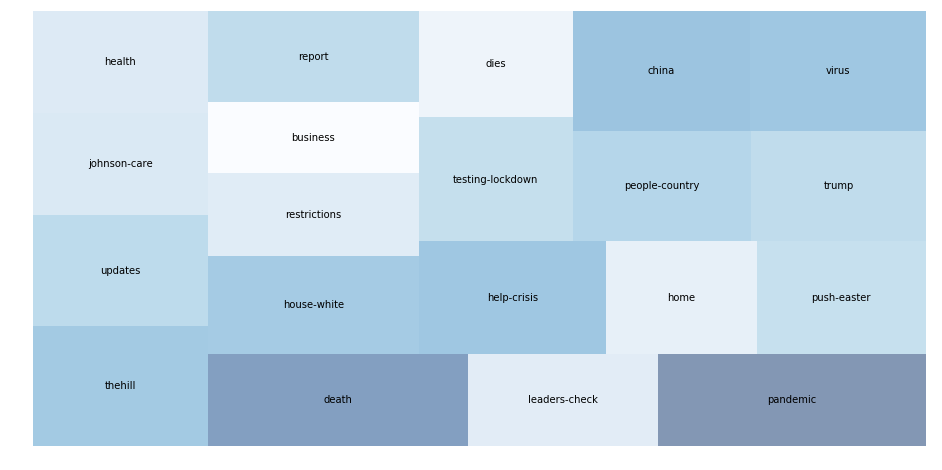

In [21]:
norm = matplotlib.colors.Normalize(vmin=min(probslist), vmax=max(probslist))
colors = [matplotlib.cm.Blues(norm(value)) for value in probslist]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 8)
squarify.plot(sizes=probslist, label=topiclist, color=colors, alpha=.5 )
plt.axis('off')
plt.show()


In [40]:
probslist

[0.00773,
 0.00718,
 0.00664,
 0.00657,
 0.00888,
 0.00647,
 0.00911,
 0.00767,
 0.0065,
 0.00558,
 0.00714,
 0.00779,
 0.00626,
 0.00704,
 0.00705,
 0.00603,
 0.00733,
 0.00715,
 0.00789,
 0.0078]

In [23]:
oparr=np.stack((topiclist,probslist),axis=-1)

In [34]:
toappend=pd.DataFrame(oparr)


In [53]:
print (time.strftime("%m/%d/%Y"))
toappend['Date_uploaded']=time.strftime("%Y/%m/%d")

04/28/2020


In [55]:
toappend=toappend.rename(columns={0: "Topics", 1: "Probability"})
toappend

,Topics,Probability,Date_uploaded
0,thehill,0.00773,2020/04/28
1,updates,0.00718,2020/04/28
2,johnson-care,0.00664,2020/04/28
3,health,0.00657,2020/04/28
4,death,0.00888,2020/04/28
5,leaders-check,0.00647,2020/04/28
6,pandemic,0.00911,2020/04/28
7,house-white,0.00767,2020/04/28
8,restrictions,0.0065,2020/04/28
9,business,0.00558,2020/04/28


In [59]:
toappend["Probability"] = pd.to_numeric(toappend["Probability"])
toappend["Date_uploaded"] = pd.to_datetime(toappend["Date_uploaded"]) 

In [60]:
toappend.dtypes

Topics                   object
Probability             float64
Date_uploaded    datetime64[ns]
dtype: object

In [61]:
toappend.to_gbq(
    destination_table='Topic_Modelling.Topics', project_id="not-a-doctor-273222", if_exists='append',
)

InvalidSchema: Please verify that the structure and data types in the DataFrame match the schema of the destination table.

In [51]:
toappend.to_csv('FinalTop.csv')

In [58]:
toappend.dtypes

Topics           object
Probability      object
Date_uploaded    object
dtype: object